In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import open3d
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation as R3D

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Prepare Scene

In [3]:
from pycamcal.simulation.cornell_box import create_cornell_box
from pycamcal.simulation.checkerboard import create_checkerboard_mesh

# create basic environment for some nice visual context
cornell_box = create_cornell_box(width=6, height=5)

# create calibration target
checkerboard = create_checkerboard_mesh(num_rows=7, num_cols=10, square_size=0.2)
checkerboard.translate([0, 0, 1])
checkerboard.rotate(R3D.from_euler("x", 90, degrees=True).as_matrix())

scene = [*cornell_box.values(), checkerboard]
print(scene)

[TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 280 points and 140 triangles.]


In [20]:
# preview scene setup
world_axes = open3d.geometry.TriangleMesh.create_coordinate_frame()
open3d.visualization.draw_geometries([*scene, world_axes], mesh_show_back_face=True)

## Prepare Camera

In [18]:
from pycamcal.camera_model import CameraModel
from pycamcal.camera_model import RadialTangentialDistortion

distortion = RadialTangentialDistortion(
    k1=-0.25,
    k2=0.0,
    k3=0.0,
    p1=0.0,
    p2=0.0
)

camera = CameraModel.from_fov(
    res_xy = (120*5, 100*5),
    fov_xy = (72, 60),
    distortion = distortion
)

print(camera)

## Render

undistorting rays: 100%|██████████| 300000/300000 [01:09<00:00, 4300.98it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000596046448].


(300000, 3)


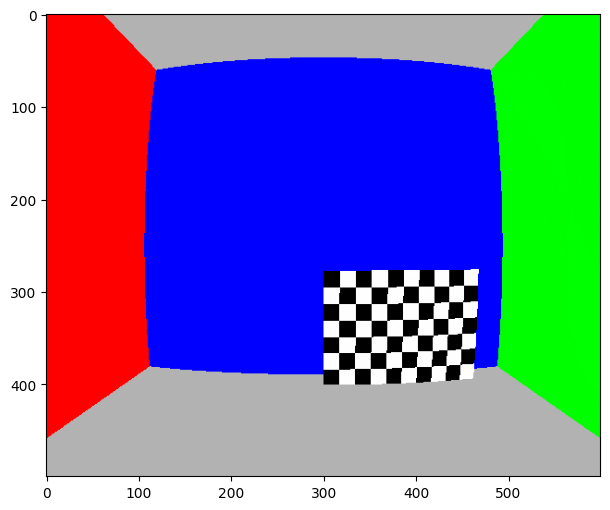

In [19]:
from pycamcal.primitives.pose import Pose3D
from pycamcal.simulation.raycasting import raycast_scene

# rays = open3d.t.geometry.RaycastingScene.create_rays_pinhole(
#         fov_deg=90,
#         eye=[0, -4, 2.0],
#         center=[0, 0, 2.4],
#         up=[0, 1, 0],
#         width_px=1200,
#         height_px=1000,
#     )

camera_pose = Pose3D(
    R3D.from_euler("x", -90, degrees=True),
    [0, -4.0, 2.0]
)

ray_colors = raycast_scene(scene, camera, camera_pose)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(ray_colors)